## Exercises, week 12

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)  # Show all columns in data frames
plt.rcParams["figure.figsize"] = (15, 5)    # Width and height for figures
sns.set_theme(style="darkgrid")

Citi Bike is a bicycle sharing service operating in New York and New Jersey. In the CSV file `jc-202205-citibike.csv` you will find the following data about **all Citi Bike rides taken in May 2022 in Jersey City**:

- Ride ID
- Rideable type
- Started at
- Ended at
- Duration (in seconds)
- Start station name
- Start station ID
- End station name
- End station ID
- Member or casual ride

**Each task must be solved programmatically, i.e. you need to write Python code that uses the data file and outputs an answer. Your code must work even if the order of the rows and columns in the CSV file changes. You are not allowed to modify the content of the CSV file.**

Tip: First inspect the content of the file. Then read all assignments in this section, and think about what operations you should do with the data before solving the assignments (e.g. what to use as the index, you might want to add some columns to the data frame and/or sort the rows in a particular order, etc.)

<small>Source of data: Lyft, Inc.</small>

You might read and pre-process the data in the following cells. Feel free to add extra cells if you need them.

In [4]:
citibikes_df = pd.read_csv("jc-202205-citibike.csv")

### Assignment 1

1. How many rows are in the data set?
2. How many rows have missing `end_station_id`?

In [5]:
print("Amount of rows in the dataset: ", citibikes_df.shape[0])


print("Amount of rows missing in end_station_id column: ", citibikes_df["end_station_id"].isnull().sum())

Amount of rows in the dataset:  80481
Amount of rows missing in end_station_id column:  186


### Assignment 2

Where (the station name) and when did the ride C6543127E23083E9 start?

In [17]:

citibikes_df = pd.read_csv("jc-202205-citibike.csv", index_col="ride_id")
#citibikes_df.loc['C6543127E23083E9']
citibikes_df.loc['C6543127E23083E9'][['start_station_name', 'started_at']]



start_station_name           Newport Pkwy
started_at            2022-05-21 22:26:24
Name: C6543127E23083E9, dtype: object

### Assignment 3

What were the 5 most popular start stations (names) and how many rides started at each of them during May 2022? Sort the list in the descending order (i.e. starting with the most popular station).

In [50]:

citibikes_df['Year_Month'] = pd.to_datetime(citibikes_df['started_at'], format='%Y-%m-%d %H:%M:%S')

citibikes_df['Year_Month'] = citibikes_df['Year_Month'].dt.strftime('%Y-%m')

citibikes_df_22_05 = citibikes_df[citibikes_df['Year_Month']=='2022-05']
citibikes_df_22_05['start_station_name'].value_counts(sort=True)[0:5]


#['year'] = citibikes_df['started_at'].dt.year

South Waterfront Walkway - Sinatra Dr & 1 St    4241
Hoboken Terminal - Hudson St & Hudson Pl        3785
Grove St PATH                                   3610
Sip Ave                                         2141
City Hall - Washington St & 1 St                2141
Name: start_station_name, dtype: int64

### Assignment 4

Group the rows by the start date and show the number of rides and the median duration for each day in a table. The table must be sorted by date, starting with 1 May end ending with 31 May. You can use any format for the dates in the table (e.g. 2022-05-01, "May 1", "01.05.2022"), but you can also show only the day (e.g. 1).

Visualize the number of rides in a count plot, using one color for weekdays (i.e. Mondays to Fridays) and another for weekends (i.e. Saturdays and Sundays).

      ride_median_duration  ride_count
Date                                  
01                   637.0        3163
02                   386.0        1557
03                   390.0        2429
04                   401.0        2161
05                   455.0        3108
06                   362.0         886
07                   394.0         577
08                   489.0        1535
09                   427.0        2361
10                   417.0        2624
11                   405.0        2698
12                   435.0        2828
13                   419.0        2530
14                   483.0        2214
15                   632.0        3361
16                   396.0        2207
17                   447.0        3126
18                   435.0        3190
19                   430.0        2407
20                   413.0        2134
21                   599.0        3816
22                   645.0        3735
23                   479.0        2942
24                   415.

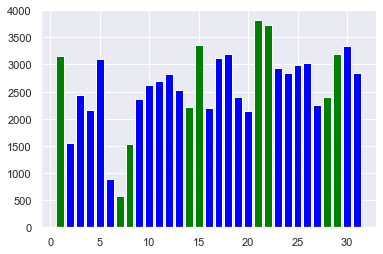

In [43]:
citibikes_df= pd.read_csv('jc-202205-citibike.csv')
citibikes_df['Date'] = pd.to_datetime(citibikes_df['started_at'], format='%Y-%m-%d %H:%M:%S')
citibikes_df['Date'] = citibikes_df['Date'].dt.strftime('%d')

statics = citibikes_df.groupby('Date').agg(
    ride_median_duration=('duration', 'median'),
    ride_count=('ride_id', 'count'))

print(statics)
del statics['ride_median_duration']

date_list =citibikes_df["Date"].unique().tolist()
date_list_int =[]
for i in sorted(date_list):
    date_list_int.append(int(i))


palette=['blue' if val in range(2,7) or val in range(9,14) or val in range(16,21) or val in range(23,28) or val in range(30,32) else 'green' for val in date_list_int]

plt.bar(x=date_list_int, height=statics['ride_count'], color=palette)
plt.show()


### Assignment 5

Considering only the rides from the station with id JC063, output a table showing the median ride duration for classic bikes, docked bikes and electric bikes (i.e. for each of the possible rideable types). Sort the table by this statistic in the descending order.

In [57]:
citibikes_df= pd.read_csv('jc-202205-citibike.csv')
citibikes_df_sub = citibikes_df[citibikes_df['start_station_id'] == 'JC063']


(citibikes_df_sub.groupby('rideable_type').agg(median_ride_duration=('duration','median'))).sort_values(by="median_ride_duration", ascending=False)


,median_ride_duration
rideable_type,
docked_bike,2292.5
classic_bike,1014.0
electric_bike,960.0


### Assignment 6

How many rides started and ended at the same station?

In [86]:
same_loc = citibikes_df['start_station_id'] == citibikes_df['end_station_id']
sum(same_loc == True)

7855

### Assignment 7

How long was the longest ride? Where (the station name) and when did it start and where (the station name) and when did it end?

In [94]:
citibikes_df= pd.read_csv('jc-202205-citibike.csv')
longest_ride = citibikes_df['duration'].max() # finding out the longest_ride
citibikes_df= pd.read_csv('jc-202205-citibike.csv', index_col='duration') # indexing by duration

print("The longest ride lasted: ", longest_ride)
citibikes_df.loc[longest_ride][['start_station_name', 'started_at','end_station_name', 'ended_at']]

The longest ride lasted:  85640


start_station_name         Pershing Field
started_at            2022-05-30 23:09:58
end_station_name          E 47 St & 2 Ave
ended_at              2022-05-31 22:57:18
Name: 85640, dtype: object

### Assignment 8

Plot two histograms showing the distribution of the ride duration, one for members and one for casual riders. (You can either use two separate plots or combine both histograms in a single plot.)

Use `plt.xlim` to set the limits of the x-axis to 0 and 3600.

ValueError: x and y must have same first dimension, but have shapes (28548,) and (1,)

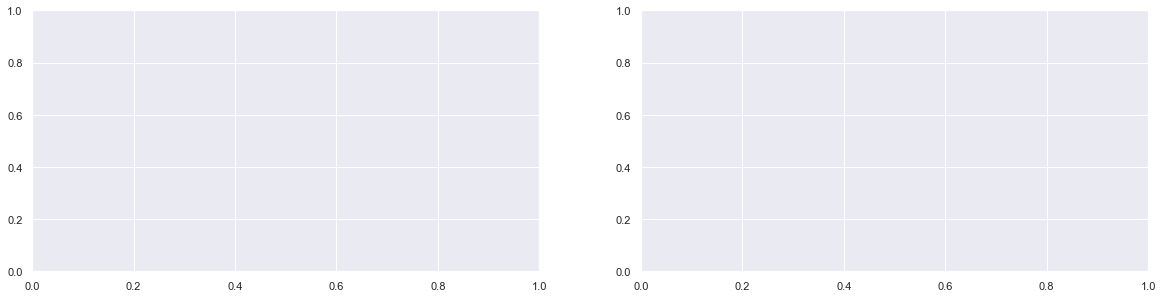

In [110]:
citibikes_df = pd.read_csv('jc-202205-citibike.csv')
casual_riders = citibikes_df[citibikes_df['member_casual']== 'casual']
member_riders = citibikes_df[citibikes_df['member_casual']== 'member']



fig_1 = plt.figure(1, figsize=(20, 4.8))

chart1 = fig_1.add_subplot(121)
chart2 = fig_1.add_subplot(122)

chart1.plot(casual_riders['duration'], )


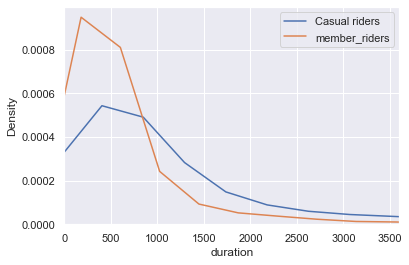

In [117]:
citibikes_df = pd.read_csv('jc-202205-citibike.csv')





casual_riders = citibikes_df[citibikes_df['member_casual']== 'casual']
member_riders = citibikes_df[citibikes_df['member_casual']== 'member']




fig, ax = plt.subplots() # use it to plot them together.

#fig, ax = plt.subplots(1,2)

sns.kdeplot(casual_riders['duration'], ax=ax) # one with the
sns.kdeplot(member_riders['duration'], ax=ax)
#sns.histplot(casual_riders, x='duration', ax=ax[0])
plt.xlim(0,3600)
plt.legend(labels=["Casual riders", "member_riders"])

#sns.histplot(member_riders, x='duration', ax=ax[1])
#sns.histplot(casual_riders['Duration'], ax=ax)
#plt.xlim(0,3600)
#plt.legend(labels=["Member riders"])
#p1.show()#(citibikes_df.groupby('member_casual').agg(sum_ride_duration=('duration','sum'))).sort_values(by="sum_ride_duration", ascending=False)





### Assignment 9

How many rides started during each hour of 2 May 2022? (Hour 0 means 00:00:00 to 00:59:59, hour 1 means 01:00:00 to 01:59:59, etc.)

Present the result both in a tabular form and as a count plot.

Rides started on May 2nd each hour: 
 00     22
01      6
02      5
03      5
04      6
05     12
06     16
07     62
08    124
09     78
10     60
11     47
12     54
13     48
14     75
15    106
16    109
17    169
18    191
19    143
20     92
21     68
22     37
23     22
Name: Hour, dtype: int64


/var/folders/st/fdj1x7953hs7bks8mx4q3yn00000gn/T/ipykernel_5919/3864127443.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citibikes_may02_df['Hour'] = citibikes_df['Date'].dt.strftime('%H')


<AxesSubplot:>

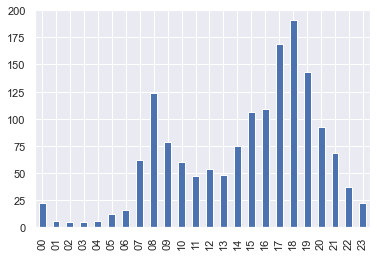

In [73]:
citibikes_df = pd.read_csv('jc-202205-citibike.csv')
citibikes_df['Date'] = pd.to_datetime(citibikes_df['started_at'], format='%Y-%m-%d %H:%M:%S')
citibikes_df['Day'] = citibikes_df['Date'].dt.strftime('%d')
citibikes_may02_df = citibikes_df[citibikes_df['Day'] == '02']


citibikes_may02_df['Hour'] = citibikes_df['Date'].dt.strftime('%H')
hourly_rides = (citibikes_may02_df['Hour'].value_counts().sort_index())

print("Rides started on May 2nd each hour: \n",
      hourly_rides)
hourly_rides.plot.bar()






### Assignment 10

How many rides per day in average started on weekdays (i.e. Monday to Friday) and how many on weekends (i.e. Saturday and Sunday)?

In [89]:
#del citibikes_df['Day'] # no need for col. Day -> we can drop it.
citibikes_df['Date'] = pd.to_datetime(citibikes_df['started_at'], format='%Y-%m-%d %H:%M:%S')
citibikes_df['Date'] = citibikes_df['Date'].dt.strftime('%Y-%m-%d') # we don't need the timestamps ->  reformat it to yyyy-mm-dd
citibikes_df['Date'] = pd.to_datetime(citibikes_df['Date'])
citibikes_df['IsWeekend'] = citibikes_df['Date'].dt.weekday >=5
print(sum(citibikes_df['IsWeekend'] == True), " Rides started on the weekends")
print(sum(citibikes_df['IsWeekend'] == False), " Rides started on weekdays")

23998  Rides started on the weekends
56483  Rides started on weekdays
